**Description**: Analyze accuracies for $m = 50, n = 500$.

**Estimated runtime**: ~30 min. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 500

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

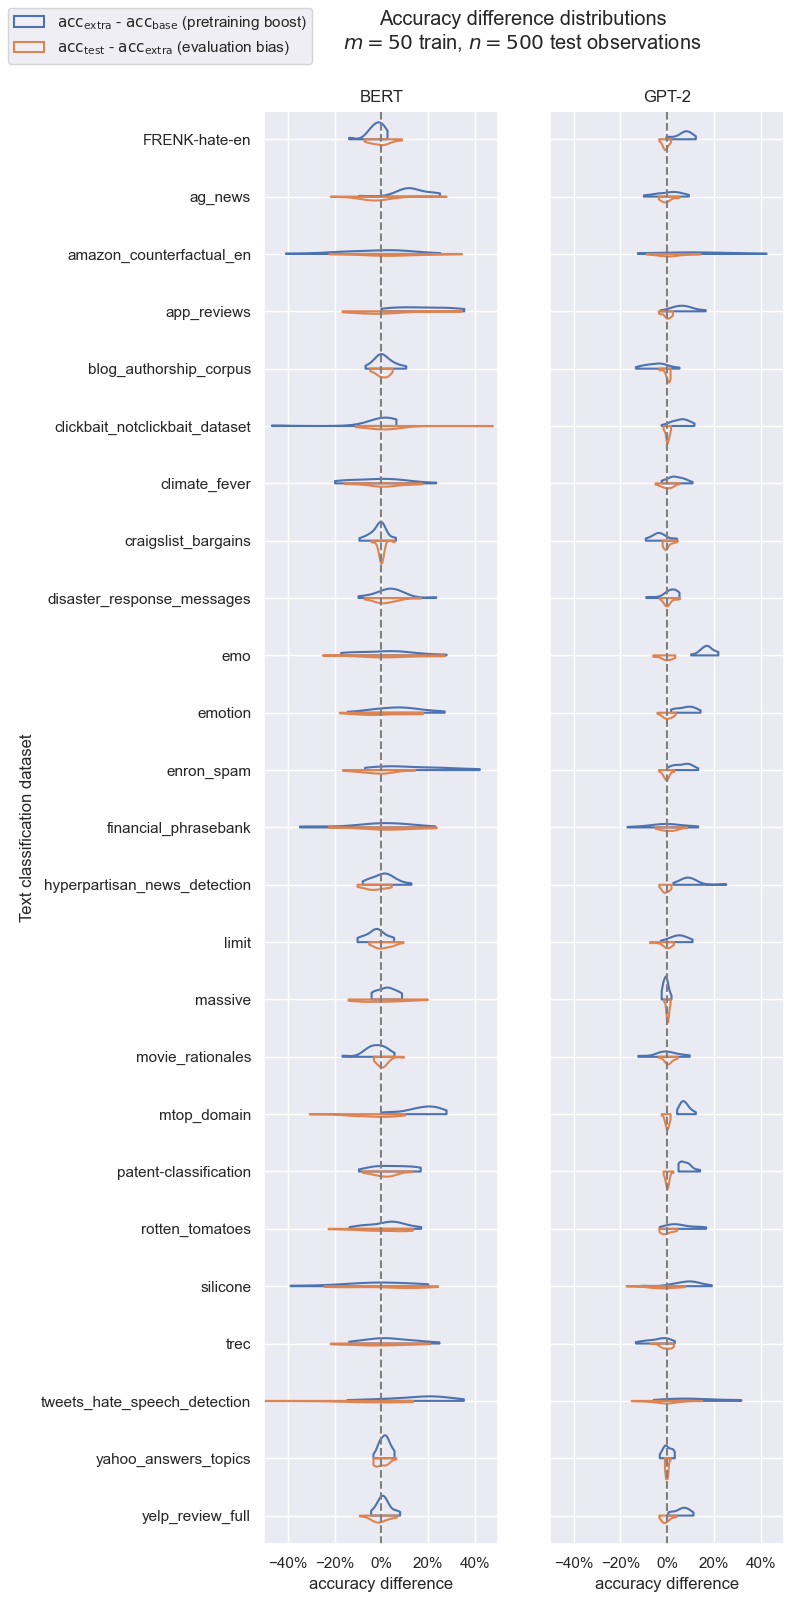

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Pretraining boost

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.04061 ┆ 0.009036 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.198619 ┆ 0.056562 │
└──────────┴──────────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",0.0231,0.012982
"""ag_news""",0.06895,0.02067
"""amazon_counterfactual_en""",0.0442,0.037464
"""app_reviews""",0.11885,0.022614
"""blog_authorship_corpus""",-0.01795,0.011856
…,…,…
"""silicone""",0.0334,0.027857
"""trec""",-0.00185,0.019442
"""tweets_hate_speech_detection""",0.1337,0.026855
"""yahoo_answers_topics""",0.00785,0.004806


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",0.054106,0.025283
"""ag_news""",0.127452,0.04223
"""amazon_counterfactual_en""",0.122994,0.077511
"""app_reviews""",0.932929,0.193199
"""blog_authorship_corpus""",-0.029187,0.022639
…,…,…
"""silicone""",0.139717,0.067943
"""trec""",0.034178,0.091192
"""tweets_hate_speech_detection""",0.272451,0.058745
"""yahoo_answers_topics""",0.090332,0.048601


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 466 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.06933,0.13783,-0.13686,0.29239,0.00308,0.00218,2016.95763,2302.65119,1.00216
1|dataset:method[FRENK-hate-en:extra],-0.05908,0.13860,-0.27843,0.15588,0.00300,0.00213,2150.48857,2439.88585,1.00135
1|dataset:method[ag_news:base],-0.02031,0.13264,-0.23974,0.18395,0.00320,0.00226,1719.33677,2344.87664,1.00156
1|dataset:method[ag_news:extra],0.03473,0.13173,-0.19029,0.22792,0.00302,0.00213,1904.97100,2465.38344,1.00138
1|dataset:method[amazon_counterfactual_en:base],0.02177,0.13839,-0.19361,0.23888,0.00308,0.00218,2020.47165,2437.94913,1.00107
1|dataset:method[amazon_counterfactual_en:extra],-0.00191,0.13768,-0.22315,0.20979,0.00299,0.00211,2135.35421,2715.13248,1.00060
1|dataset:method[app_reviews:base],-0.28798,0.13521,-0.49331,-0.06872,0.00285,0.00206,2224.41507,2793.87239,1.00055
1|dataset:method[app_reviews:extra],0.25487,0.13531,0.05018,0.48426,0.00272,0.00192,2478.89229,2584.41931,1.00084
1|dataset:method[blog_authorship_corpus:base],0.15262,0.13612,-0.06656,0.36799,0.00292,0.00212,2152.36566,2320.75684,1.00031
1|dataset:method[blog_authorship_corpus:extra],-0.14089,0.13706,-0.35372,0.08325,0.00295,0.00208,2166.64784,2489.50107,0.99992


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


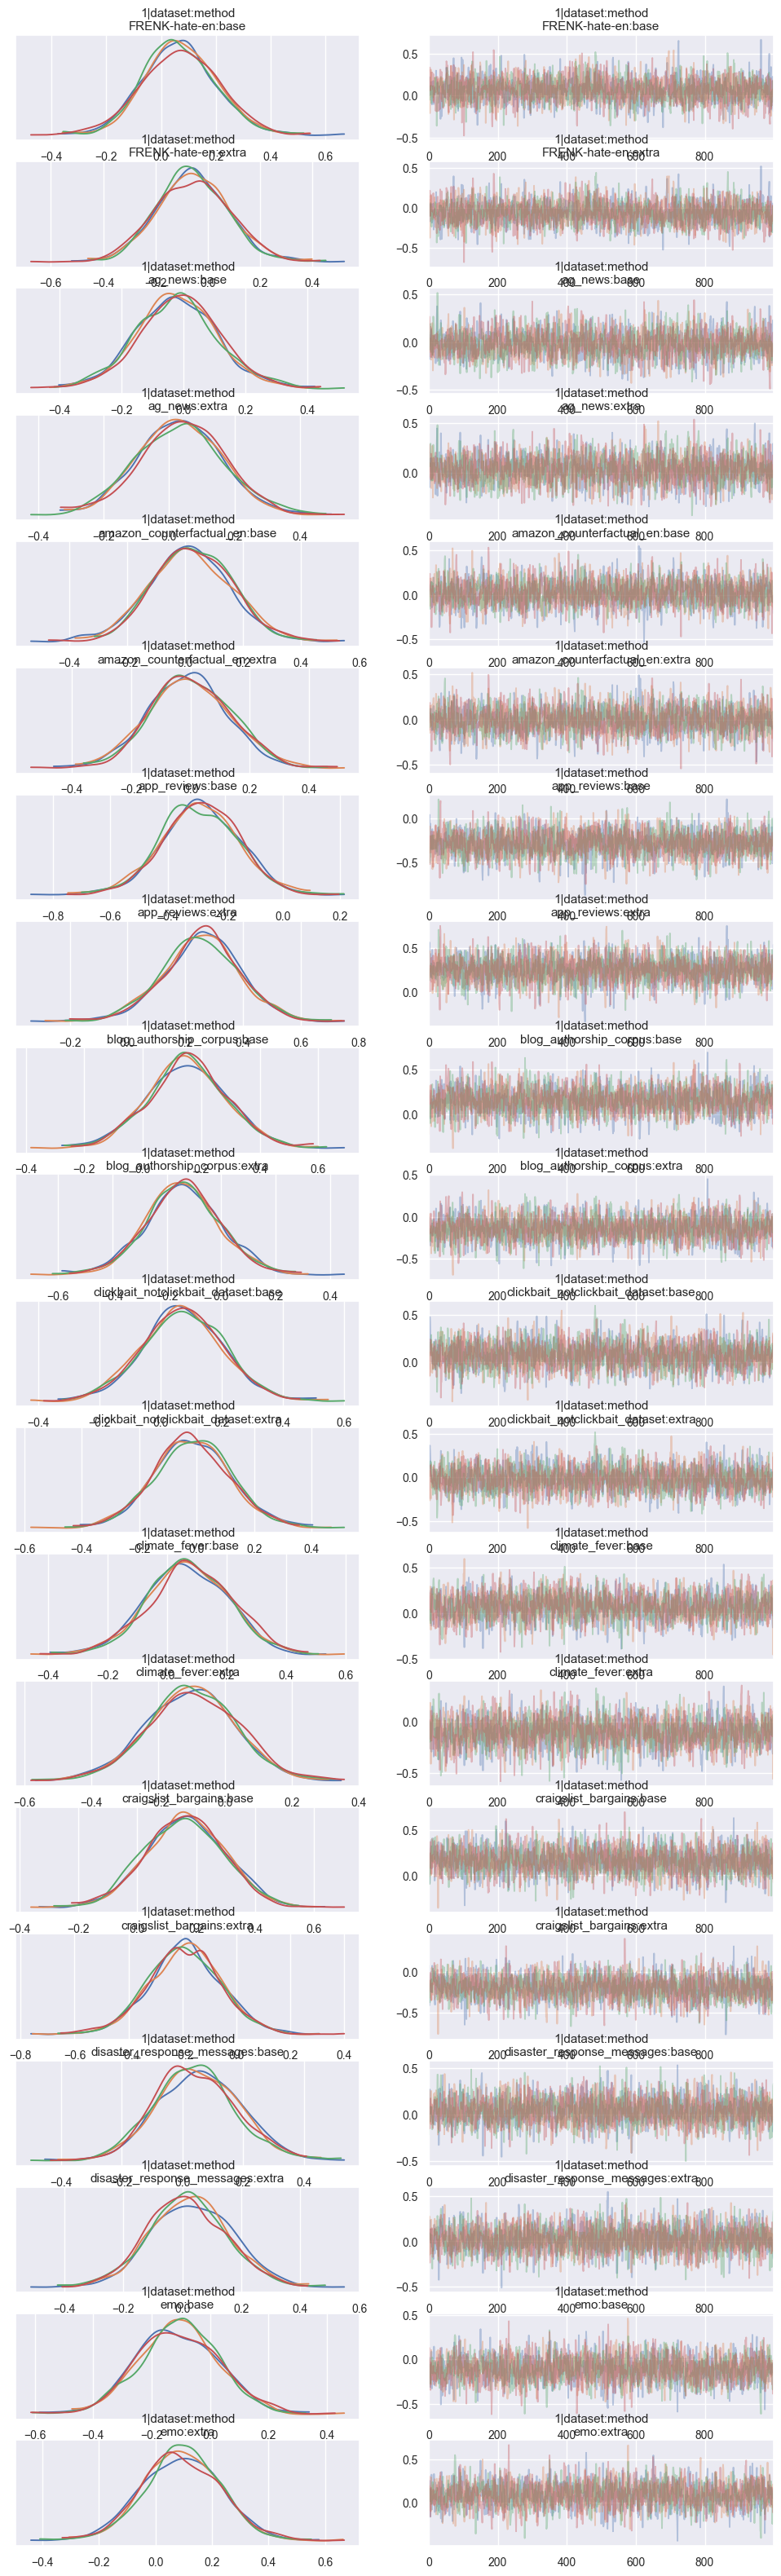

In [10]:
model_boost, summary_boost, az_summary_boost = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────┬─────────┐
│ mean  ┆ se      │
╞═══════╪═════════╡
│ 0.002 ┆ 0.00295 │
└───────┴─────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.028789 ┆ 0.009276 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.0046,0.006908
"""ag_news""",-0.0107,0.014752
"""amazon_counterfactual_en""",0.03475,0.025371
"""app_reviews""",0.00025,0.018601
"""blog_authorship_corpus""",0.0033,0.004504
…,…,…
"""silicone""",0.002,0.025635
"""trec""",-0.00815,0.019206
"""tweets_hate_speech_detection""",-0.0363,0.034703
"""yahoo_answers_topics""",-0.0006,0.00436


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.006942,0.012228
"""ag_news""",-0.005835,0.030012
"""amazon_counterfactual_en""",0.071811,0.04828
"""app_reviews""",0.053267,0.089104
"""blog_authorship_corpus""",0.00705,0.008931
…,…,…
"""silicone""",0.046322,0.066735
"""trec""",0.01388,0.074606
"""tweets_hate_speech_detection""",-0.04126,0.043392
"""yahoo_answers_topics""",0.01159,0.044044


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 491 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],0.01501,0.03981,-0.04455,0.08021,0.00073,0.00055,2951.79361,2835.55497,1.00135
1|dataset:method[FRENK-hate-en:test],-0.01446,0.03973,-0.07723,0.04687,0.00074,0.00060,2906.82197,2734.70849,1.00161
1|dataset:method[ag_news:extra],0.02668,0.03911,-0.03402,0.08943,0.00072,0.00054,2969.55420,2709.71194,1.00158
1|dataset:method[ag_news:test],-0.02521,0.03917,-0.08868,0.03439,0.00072,0.00055,2954.98276,2656.86618,1.00108
1|dataset:method[amazon_counterfactual_en:extra],-0.07065,0.03956,-0.13428,-0.00799,0.00067,0.00051,3494.21906,2370.88624,1.00238
1|dataset:method[amazon_counterfactual_en:test],0.07311,0.03948,0.00741,0.13197,0.00063,0.00047,3892.58430,2981.37058,1.00363
1|dataset:method[app_reviews:extra],0.00503,0.04025,-0.06108,0.06595,0.00074,0.00060,2915.84602,2783.90203,1.00002
1|dataset:method[app_reviews:test],-0.00574,0.03996,-0.06553,0.06008,0.00071,0.00055,3177.34660,3180.22765,1.00007
1|dataset:method[blog_authorship_corpus:extra],-0.00075,0.03966,-0.06038,0.06432,0.00072,0.00062,3046.63777,2597.34408,1.00094
1|dataset:method[blog_authorship_corpus:test],-0.00048,0.03982,-0.06119,0.06290,0.00073,0.00062,2941.41758,2950.36252,1.00085


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


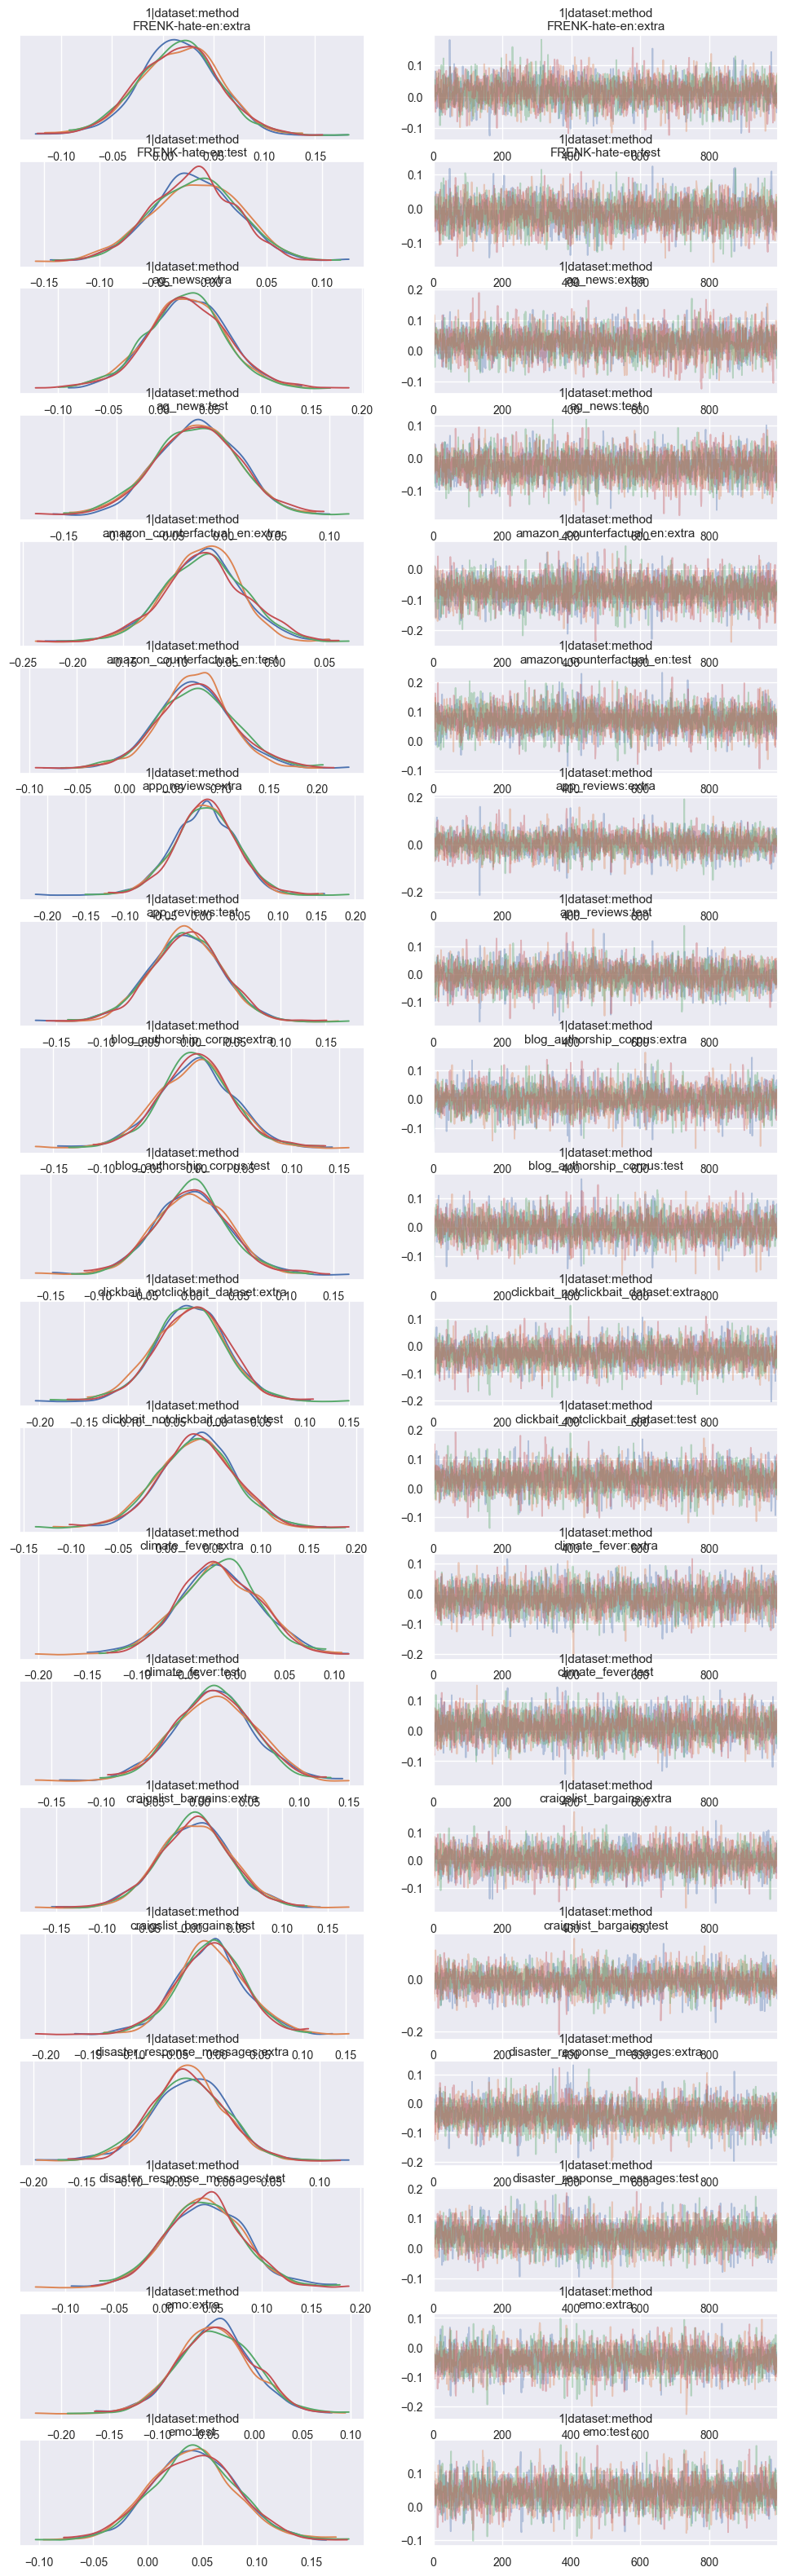

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/m50/main_m50_n500_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/m50/main_m50_n500_bias.nc'